Checking for null values
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Sample data:
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500

Getting summary of statistical information about the data set
              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000

Performing data normalization
          Date        Time State     Group      Unit     Sales
0   1-Oct-2020     Morning    WA      Kids  0.095238  0.095238
1   1-Oct-2020     Morning

C:\Users\asus\AppData\Local\Temp\ipykernel_8296\1531967732.py:63: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data.resample('M').sum()
C:\Users\asus\AppData\Local\Temp\ipykernel_8296\1531967732.py:64: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = sales_data.resample('Q').sum()


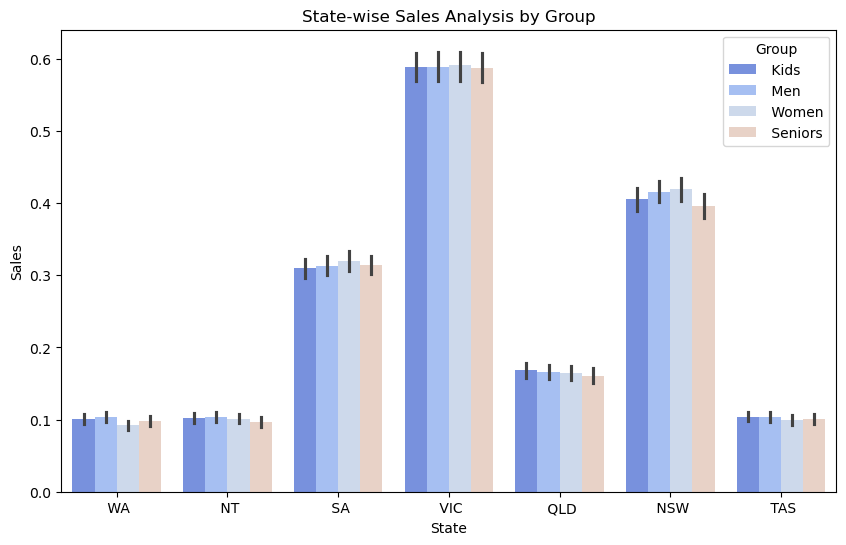

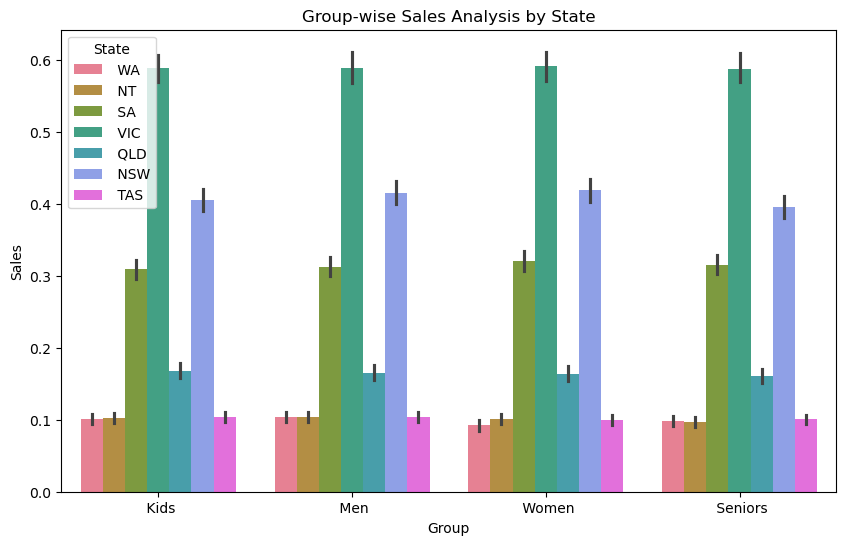

C:\Users\asus\AppData\Local\Temp\ipykernel_8296\1531967732.py:98: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(x='Time', y='Sales', hue='State', data=sales_data, palette=custom_palette)


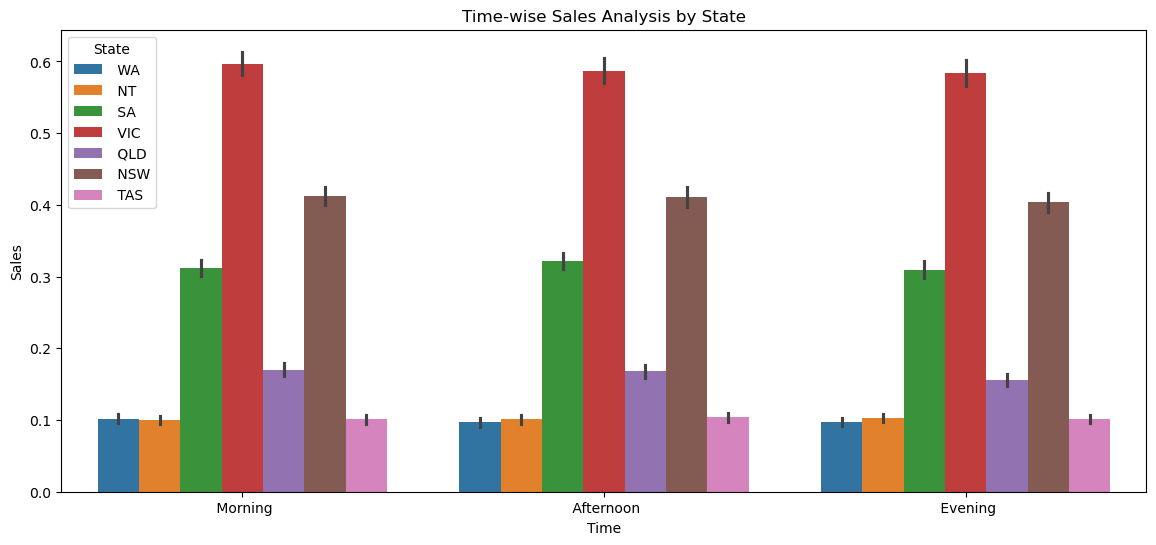

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'AusApparalSales4thQrt2020.csv'
sales_data = pd.read_csv(file_path)

# DATA WRANGLING
# 1) Check for missing values
missing_values = sales_data.isna().sum()
print("Checking for null values")
print(missing_values)

# 2) getting summary statistics of the dataset
# Display the first few rows of the dataset
print("\nSample data:")
print(sales_data.head())

# Summary statistics before normalization
print("\nGetting summary of statistical information about the data set")
print(sales_data[['Unit', 'Sales']].describe())

# 3) Data Normalization
# Normalize 'Unit' and 'Sales' columns using Min-Max normalization
scaler = MinMaxScaler()
sales_data[['Unit', 'Sales']] = scaler.fit_transform(sales_data[['Unit', 'Sales']])

# Display the first few rows of the normalized dataset
print("\nPerforming data normalization")
print(sales_data.head(11))

# Prepare data for daily analysis
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%b-%Y')
sales_data.set_index('Date', inplace=True)
daily_data = sales_data.groupby(['Date'])[['Sales', 'Unit']].sum()

# Calculate mean, median, and mode for sales and units per day
# DATA ANALYSIS
new_df=pd.read_csv('AusApparalSales4thQrt2020.csv')
new_df['Date']=pd.to_datetime(new_df['Date'])
new_df.drop(columns={'Time','State','Group'},inplace=True)
new_df=new_df.groupby('Date')[['Sales','Unit']].sum()

print(f"\nThe Mean , Median and Mode of sales as per day during the fourth quarter are: \nMean : {int(new_df['Sales'].mean())} \nMedian: {int(new_df['Sales'].median())} \nMode: {new_df['Sales'].max()}")

print(f"\nThe Mean , Median and Mode of Units as per day during the fourth quarter are:\nMean : {int(new_df['Unit'].mean())} \nMedian: {int(new_df['Unit'].median())} \nMode: {new_df['Unit'].max()}")


# Sales by State
state_sales = sales_data.groupby('State')['Sales'].sum().sort_values(ascending=False)
print("\nSales by State are as follows:")
print(state_sales)

# Sales by Group
group_sales = sales_data.groupby('Group')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Group are as follows:")
print(group_sales)

# Weekly, Monthly, and Quarterly reports
weekly_sales = sales_data.resample('W').sum()
monthly_sales = sales_data.resample('M').sum()
quarterly_sales = sales_data.resample('Q').sum()

print("\nWeekly sales of the brand from highest to lowest are:")
print(weekly_sales['Sales'].sort_values(ascending=False))

print("\nMonthly sales of the brand from highest to lowest are:")
print(monthly_sales['Sales'].sort_values(ascending=False))

print("\nQuarterly sales of the brand are:")
print(quarterly_sales['Sales'].sum())

# Set the color palette for the visualizations
sns.set_palette("coolwarm")

# DATA VISUALIZATION

# 1) State-wise sales analysis for different demographic groups
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_data, x='State', y='Sales', hue='Group')
plt.title('State-wise Sales Analysis by Group')
plt.show()

# 2) Group-wise sales analysis across various states
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_data, x='Group', y='Sales', hue='State')
plt.title('Group-wise Sales Analysis by State')
plt.show()


# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# 3) Time-wise Sales Analysis by State with a custom color palette
plt.figure(figsize=(14, 6))
sns.barplot(x='Time', y='Sales', hue='State', data=sales_data, palette=custom_palette)
plt.title("Time-wise Sales Analysis by State")
plt.show()

